# Import basic libraries

In [238]:
import sklearn.metrics as sm
import re
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords

In [239]:
%matplotlib inline

In [240]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hansanar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [241]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hansanar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hansanar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Importing the dataset

In [242]:
expenses_dataset = pd.read_csv('ExpenseData.csv')

## Display the dataset

In [243]:
expenses_dataset

,Date,Place,Item,Quantity,Price,Category
0,1/9/2023,Arpico Super Store,Prima Kottumee,5,650,Grocery
1,1/9/2023,BlueCrossLife,X-RAY DENTAL IOPA,1,1800,Medical
2,1/9/2023,BlueCrossLife,X-RAY DENTAL OPG - HOSPITAL VIEW,1,3100,Medical
3,1/9/2023,IUS Pharmacy & Grocery,Glemaz - 2mg,7,22,Medical
4,1/9/2023,IUS Pharmacy & Grocery,Glucophage - 2mg,7,350,Medical
...,...,...,...,...,...,...
29754,12/3/2022,Household,Home repairs and maintenance,1,1750,Housing and Bills
29755,11/15/2022,Household,Home improvement,1,800,Housing and Bills
29756,11/17/2022,Household,Pest control services,1,550,Housing and Bills
29757,6/21/2022,Household,Home security,1,1110,Housing and Bills


In [244]:
expenses_dataset['Total'] = expenses_dataset['Price'] * expenses_dataset['Quantity']

In [245]:
expenses_dataset['Month'] = expenses_dataset['Date'].str[0]

In [246]:
expenses_dataset.head()

,Date,Place,Item,Quantity,Price,Category,Total,Month
0,1/9/2023,Arpico Super Store,Prima Kottumee,5,650,Grocery,3250,1
1,1/9/2023,BlueCrossLife,X-RAY DENTAL IOPA,1,1800,Medical,1800,1
2,1/9/2023,BlueCrossLife,X-RAY DENTAL OPG - HOSPITAL VIEW,1,3100,Medical,3100,1
3,1/9/2023,IUS Pharmacy & Grocery,Glemaz - 2mg,7,22,Medical,154,1
4,1/9/2023,IUS Pharmacy & Grocery,Glucophage - 2mg,7,350,Medical,2450,1


In [247]:
expenses_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29759 entries, 0 to 29758
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      29759 non-null  object
 1   Place     29759 non-null  object
 2   Item      29759 non-null  object
 3   Quantity  29759 non-null  int64 
 4   Price     29759 non-null  int64 
 5   Category  29759 non-null  object
 6   Total     29759 non-null  int64 
 7   Month     29759 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.8+ MB


In [248]:
len(expenses_dataset.Category.value_counts())

6

In [249]:
expenses_dataset.Category.unique()

array(['Grocery', 'Medical', 'Housing and Bills', 'Food', 'Personal Care',
       'Transport'], dtype=object)

## Generates descriptive statistics

In [250]:
expenses_dataset.describe()

,Quantity,Price,Total
count,29759.00000,29759.000000,29759.000000
mean,1.00289,386.827548,389.956685
std,0.12855,318.035434,383.121829
min,1.00000,10.000000,30.000000
25%,1.00000,207.000000,207.000000
50%,1.00000,311.000000,311.000000
75%,1.00000,416.000000,416.000000
max,7.00000,12900.000000,20160.000000


# Data Preprocessing

 ## Checking For Nulls

In [251]:
sum(expenses_dataset.isnull().sum())

0

In [252]:
expenses_dataset.isnull().sum()

Date        0
Place       0
Item        0
Quantity    0
Price       0
Category    0
Total       0
Month       0
dtype: int64

<AxesSubplot: >

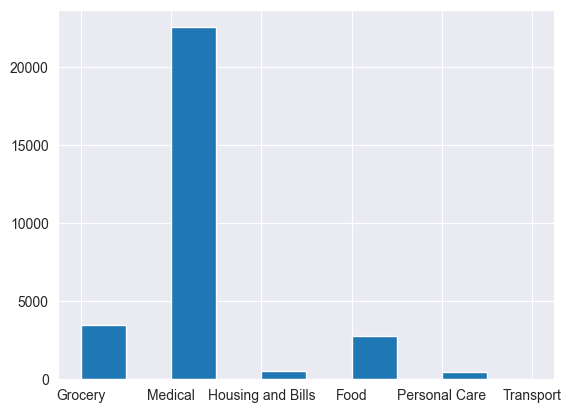

In [253]:
expenses_dataset["Category"].hist()

## Dropping duplicates


In [254]:
expenses_dataset.shape

(29759, 8)

In [255]:
new = expenses_dataset.drop_duplicates(inplace=True)

In [256]:
expenses_dataset.shape

(29759, 8)

In [257]:
fig = px.pie(expenses_dataset, values="Total", names="Category")
fig.show()

In [258]:
fig = px.histogram(expenses_dataset, x="Month", y="Total")
fig.show()

In [259]:
print(expenses_dataset['Item'].apply(lambda x: len(x.split(' '))).sum())

72465


In [260]:
le = LabelEncoder()
expenses_dataset['Category_enc'] = le.fit_transform(expenses_dataset['Category'])
display(expenses_dataset.head())

,Date,Place,Item,Quantity,Price,Category,Total,Month,Category_enc
0,1/9/2023,Arpico Super Store,Prima Kottumee,5,650,Grocery,3250,1,1
1,1/9/2023,BlueCrossLife,X-RAY DENTAL IOPA,1,1800,Medical,1800,1,3
2,1/9/2023,BlueCrossLife,X-RAY DENTAL OPG - HOSPITAL VIEW,1,3100,Medical,3100,1,3
3,1/9/2023,IUS Pharmacy & Grocery,Glemaz - 2mg,7,22,Medical,154,1,3
4,1/9/2023,IUS Pharmacy & Grocery,Glucophage - 2mg,7,350,Medical,2450,1,3


Category
Food                 3.832727
Grocery              1.770792
Housing and Bills    2.948718
Medical              2.362692
Personal Care        2.071579
Transport            1.000000
Name: word_count, dtype: float64


C:\Users\hansanar\AppData\Local\Temp\ipykernel_8456\458628634.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\hansanar\AppData\Local\Temp\ipykernel_8456\458628634.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\hansanar\AppData\Local\Temp\ipykernel_8456\458628634.py:5: UserWarning:



`distplot`

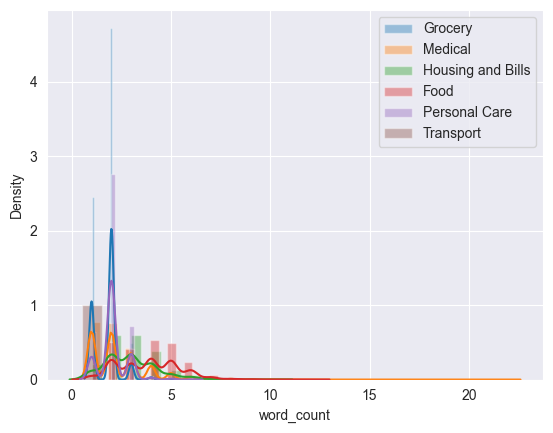

In [261]:
expenses_dataset['word_count'] = expenses_dataset['Item'].str.split().str.len()
print(expenses_dataset.groupby('Category')['word_count'].mean())
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Grocery']['word_count'], label='Grocery')
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Medical']['word_count'], label='Medical'),
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Housing and Bills']['word_count'], label='Housing and Bills'),
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Food']['word_count'], label='Food'),
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Personal Care']['word_count'], label='Personal Care'),
sns.distplot(expenses_dataset[expenses_dataset['Category']=='Transport']['word_count'], label='Transport'),
plt.legend()
plt.show()

In [262]:
# Make the letters lower case and tokenize the words
tokenized_items = expenses_dataset['Item'].str.lower().apply(word_tokenize)

print(tokenized_items)

0                              [prima, kottumee]
1                          [x-ray, dental, iopa]
2        [x-ray, dental, opg, -, hospital, view]
3                               [glemaz, -, 2mg]
4                           [glucophage, -, 2mg]
                          ...                   
29754          [home, repairs, and, maintenance]
29755                        [home, improvement]
29756                  [pest, control, services]
29757                           [home, security]
29758                                [pet, care]
Name: Item, Length: 29759, dtype: object


## Preprocessing the text

In [263]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

tokenized_items = tokenized_items.apply(alpha)

print(tokenized_items)


0                        [prima, kottumee]
1                           [dental, iopa]
2            [dental, opg, hospital, view]
3                                 [glemaz]
4                             [glucophage]
                       ...                
29754    [home, repairs, and, maintenance]
29755                  [home, improvement]
29756            [pest, control, services]
29757                     [home, security]
29758                          [pet, care]
Name: Item, Length: 29759, dtype: object


In [264]:
# Define a function to lemmatization
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for token in tokens:
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_items = tokenized_items.apply(lemmatize)

print(tokenized_items)

0                     prima kottumee
1                        dental iopa
2           dental opg hospital view
3                             glemaz
4                         glucophage
                    ...             
29754    home repair and maintenance
29755               home improvement
29756           pest control service
29757                  home security
29758                       pet care
Name: Item, Length: 29759, dtype: object


In [265]:
# Replace the columns with tokenized messages
expenses_dataset['Item'] = tokenized_items

display(expenses_dataset.head())

,Date,Place,Item,Quantity,Price,Category,Total,Month,Category_enc,word_count
0,1/9/2023,Arpico Super Store,prima kottumee,5,650,Grocery,3250,1,1,2
1,1/9/2023,BlueCrossLife,dental iopa,1,1800,Medical,1800,1,3,3
2,1/9/2023,BlueCrossLife,dental opg hospital view,1,3100,Medical,3100,1,3,6
3,1/9/2023,IUS Pharmacy & Grocery,glemaz,7,22,Medical,154,1,3,3
4,1/9/2023,IUS Pharmacy & Grocery,glucophage,7,350,Medical,2450,1,3,3


In [266]:
print(expenses_dataset['Item'].apply(lambda x: len(x.split(' '))).sum())

68363


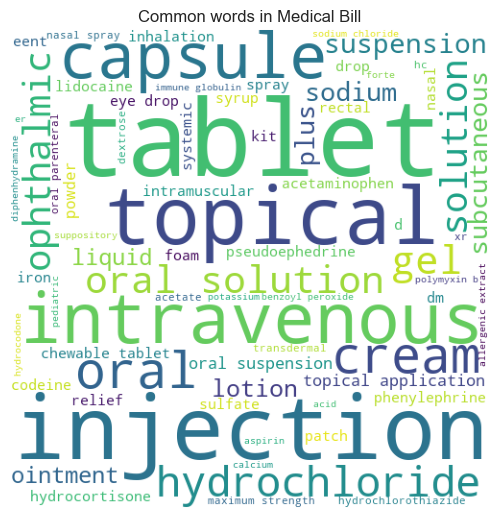

In [267]:

# Get the ham messages
medical = expenses_dataset[expenses_dataset['Category']=='Medical']['Item'].str.cat(sep=', ')

# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

# Generate the world clouds for each type of message
medical_wc = wc.generate(medical)

# plot the world cloud for medical                       
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(medical_wc) 
plt.axis("off")
plt.title("Common words in Medical Bill")
plt.tight_layout(pad = 0) 
plt.show() 

## Train Test split

In [268]:
X_train, X_test, y_train, y_test = train_test_split(expenses_dataset['Item'], expenses_dataset['Category'], test_size=0.3, random_state = 0)

In [269]:
X_train

5929                                            deltuss dp
14638    norgestrel ethinyl estradiol and ferrous fumarate
13741                                                    m
8569                                               floriva
15383                                              orvaten
                               ...                        
13123                              methocarbamol injection
19648                                      swabflush flush
9845                                             hellebore
10799     insulin lispro protamine and insulin lispro vial
2732                                    bensal hp ointment
Name: Item, Length: 20831, dtype: object

In [270]:
y_train

5929     Medical
14638    Medical
13741    Medical
8569     Medical
15383    Medical
          ...   
13123    Medical
19648    Medical
9845     Medical
10799    Medical
2732     Medical
Name: Category, Length: 20831, dtype: object

In [271]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20831,), (8928,), (20831,), (8928,))

In [272]:
# Vectorize the training data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

## Applying Naive Bayes Classifier

In [273]:
import pickle

# Train the Naive Bayes classifier
nb = MultinomialNB()
modal = nb.fit(X_train_vect, y_train)
# pickle.dump(modal, open("itemClassificationModal.h5", 'wb'))



In [274]:
# Vectorize the testing data and make predictions
X_test_vect = vectorizer.transform(X_test)
y_pred = nb.predict(X_test_vect)

In [275]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [276]:
print('Accuracy:', accuracy)
print('Confusion matrix:', confusion)

Accuracy: 0.9252912186379928
Confusion matrix: [[ 754   31    0   26    0]
 [  97  698    1  272    2]
 [   1    6   98   36    0]
 [  14   35    1 6706    0]
 [   2   76    0   67    5]]


C:\Users\hansanar\AppData\Local\Temp\ipykernel_8456\3190329480.py:6: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\hansanar\AppData\Local\Temp\ipykernel_8456\3190329480.py:6: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\hansanar\AppData\Local\Temp\ipykernel_8456\3190329480.py:6: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `serie

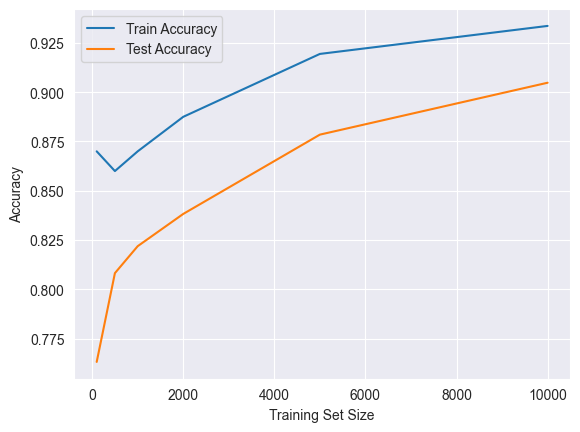

In [277]:
# Evaluate the accuracy of the classifier on the training and testing sets
train_accuracy = []
test_accuracy = []
training_sizes = [100, 500, 1000, 2000, 5000, 10000]
for size in training_sizes:
    X_train_sample, y_train_sample = X_train[:size], y_train[:size]
    X_train_vect_sample = vectorizer.transform(X_train_sample)
    nb.fit(X_train_vect_sample, y_train_sample)
    train_accuracy.append(nb.score(X_train_vect_sample, y_train_sample))
    test_accuracy.append(nb.score(vectorizer.transform(X_test), y_test))

# Plot the accuracy graph
plt.plot(training_sizes, train_accuracy, label='Train Accuracy')
plt.plot(training_sizes, test_accuracy, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [278]:
new_expense = ['chicken palandi kottu']
new_expense_vect = vectorizer.transform(new_expense)
predicted_category = nb.predict(new_expense_vect)

print(predicted_category)

['Food']


In [279]:
with open('./model.pkl', 'wb') as file2:
    pickle.dump(nb, file2)
with open('./vec.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

file.close()
file2.close()

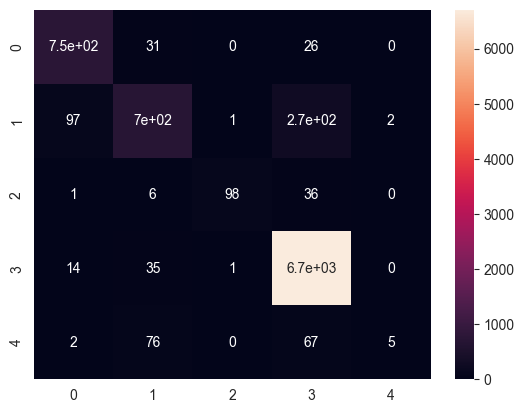

In [280]:
# plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
# sns.heatmap(mat, square = True, annot=True, xticklabels=False,yticklabels=False)
hm = sns.heatmap(data=mat,
                annot=True)
plt.show()

In [281]:
import pickle as cPickle
# save the classifier
with open('expenses_classifier.pkl', 'wb') as fid:
    cPickle.dump(modal, fid)